In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words =10000)

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
word_index = imdb. get_word_index()
reverse_word_index = dict ([ (value, key ) for (key, value) in word_index.items()])
decoded_review = ' '.join ([reverse_word_index.get ( i - 3, '?') for i in train_data[10]])

In [11]:
decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [15]:
import numpy as np

def vectorize_sequences( sequences, dimension = 10000):
    results = np.zeros ( (len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        results [i, sequence] =1.
    return results

X_train = vectorize_sequences (train_data)
X_test = vectorize_sequences (test_data)


In [16]:
X_train [10]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
train_labels[10]

1

In [20]:
np.sum(X_train[10])

215.0

In [21]:
X_train[10]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
train_data[10]

[1,
 785,
 189,
 438,
 47,
 110,
 142,
 7,
 6,
 7475,
 120,
 4,
 236,
 378,
 7,
 153,
 19,
 87,
 108,
 141,
 17,
 1004,
 5,
 2,
 883,
 2,
 23,
 8,
 4,
 136,
 2,
 2,
 4,
 7475,
 43,
 1076,
 21,
 1407,
 419,
 5,
 5202,
 120,
 91,
 682,
 189,
 2818,
 5,
 9,
 1348,
 31,
 7,
 4,
 118,
 785,
 189,
 108,
 126,
 93,
 2,
 16,
 540,
 324,
 23,
 6,
 364,
 352,
 21,
 14,
 9,
 93,
 56,
 18,
 11,
 230,
 53,
 771,
 74,
 31,
 34,
 4,
 2834,
 7,
 4,
 22,
 5,
 14,
 11,
 471,
 9,
 2,
 34,
 4,
 321,
 487,
 5,
 116,
 15,
 6584,
 4,
 22,
 9,
 6,
 2286,
 4,
 114,
 2679,
 23,
 107,
 293,
 1008,
 1172,
 5,
 328,
 1236,
 4,
 1375,
 109,
 9,
 6,
 132,
 773,
 2,
 1412,
 8,
 1172,
 18,
 7865,
 29,
 9,
 276,
 11,
 6,
 2768,
 19,
 289,
 409,
 4,
 5341,
 2140,
 2,
 648,
 1430,
 2,
 8914,
 5,
 27,
 3000,
 1432,
 7130,
 103,
 6,
 346,
 137,
 11,
 4,
 2768,
 295,
 36,
 7740,
 725,
 6,
 3208,
 273,
 11,
 4,
 1513,
 15,
 1367,
 35,
 154,
 2,
 103,
 2,
 173,
 7,
 12,
 36,
 515,
 3547,
 94,
 2547,
 1722,
 5,
 3547,
 36,
 20

In [24]:
np.sum(X_train[0])

120.0

In [25]:
y_train = np.asarray (train_labels).astype ('float32')
y_test = np.asarray (test_labels).astype ('float32')

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add (layers.Dense (16, activation= 'relu', input_shape = ( 10000,)))
model.add (layers.Dense (16, activation = 'relu'))
model.add (layers.Dense (1, activation = 'sigmoid'))

In [27]:
model.compile (optimizer= 'rmsprop',
               loss= 'binary_crossentropy',
               metrics =['accuracy'])

In [30]:
#케라스에 rmsprop, binary_crossentropy, accuracy가 포함되어 있기 때문에 
#옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능합니다. 
#이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있습니다. 
#전자의 경우에는 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 optimizer 매개변수에 전달하면 됩니다:

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
#후자의 경우는 loss와 metrics 매개변수에 함수 객체를 전달하면 됩니다:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [32]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.5122 - accuracy: 0.7875 - val_loss: 0.3813 - val_accuracy: 0.8709
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.3017 - accuracy: 0.9070 - val_loss: 0.3053 - val_accuracy: 0.8872
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2227 - accuracy: 0.9279 - val_loss: 0.2786 - val_accuracy: 0.8906
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1782 - accuracy: 0.9426 - val_loss: 0.2777 - val_accuracy: 0.8873
Epoch 5/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1416 - accuracy: 0.9569 - val_loss: 0.3099 - val_accuracy: 0.8777
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1207 - accuracy: 0.9626 - val_loss: 0.2914 - val_accuracy: 0.8852
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [37]:
import matplotlib.pyplot as plt

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

len (acc)

20

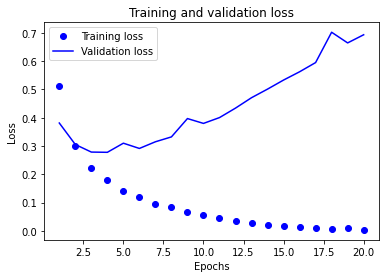

In [43]:
epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

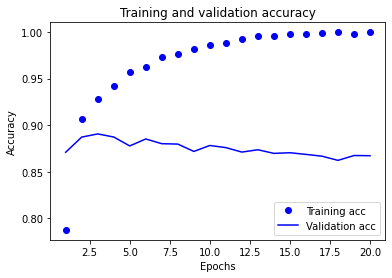

In [44]:
plt.clf()   # 그래프를 초기화합니다
#acc = history_dict['acc']
#val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
model.predict(X_test)

array([[0.01194939],
       [1.        ],
       [0.9989592 ],
       ...,
       [0.00427413],
       [0.03996265],
       [0.9338274 ]], dtype=float32)